In [102]:
# importing libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
# importing dataset
data = pd.read_csv('SampleSuperstore.csv')

In [3]:
data.shape

(9994, 13)

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
#EDA
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
data['Ship Mode'].value_counts() #categories in (all rows of) first column, and their count

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

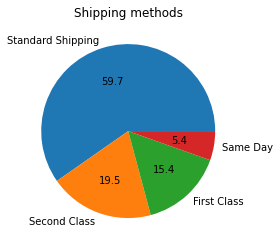

In [199]:
lab = pd.unique(['Standard Shipping', 'Second Class', 'First Class', 'Same Day']) # Pandas function to get unique values
plt.pie(data['Ship Mode'].value_counts(), labels = lab, autopct = '%.1f') # autopct shows % values
plt.title('Shipping methods')
plt.show()

##### Ship mode consists of ~60% standard class shipping

In [9]:
data.Segment.value_counts() #applying the same for the remaining columns

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

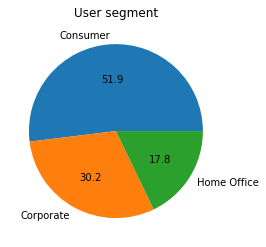

In [10]:
lab = pd.unique(data.Segment) # Pandas function to get unique values
plt.pie(data.Segment.value_counts(), labels = lab, autopct = '%.1f') # autopct shows % values
plt.title('User segment')
plt.show()

#### Consumer records account for ~52% of the data

#### 'Country' stays constant and is limited to United States, thus is omitted.

In [11]:
data.City.value_counts()

New York City     915
Los Angeles       747
Philadelphia      537
San Francisco     510
Seattle           428
                 ... 
Deer Park           1
Ontario             1
Redwood City        1
Citrus Heights      1
Elyria              1
Name: City, Length: 531, dtype: int64

In [193]:
(data.State.value_counts()/data.State.value_counts().sum())*100

California              20.022013
New York                11.286772
Texas                    9.855914
Pennsylvania             5.873524
Washington               5.063038
Illinois                 4.922954
Ohio                     4.692816
Florida                  3.832299
Michigan                 2.551531
North Carolina           2.491495
Arizona                  2.241345
Virginia                 2.241345
Georgia                  1.841105
Tennessee                1.831099
Colorado                 1.821093
Indiana                  1.490895
Kentucky                 1.390835
Massachusetts            1.350810
New Jersey               1.300780
Oregon                   1.240744
Wisconsin                1.100660
Maryland                 1.050630
Delaware                 0.960576
Minnesota                0.890534
Connecticut              0.820492
Oklahoma                 0.660396
Missouri                 0.660396
Alabama                  0.610366
Arkansas                 0.600360
Rhode Island  

#### California, New York, and Texas alone account for ~40% of total sales

In [13]:
pc = pd.unique(data['Postal Code'])
len(pc) # using len() because arrays have no count() function

631

#### 'Postal Code' has 631 unique values and adds little to no value towards boosting profits, hence will be omitted

In [14]:
data.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

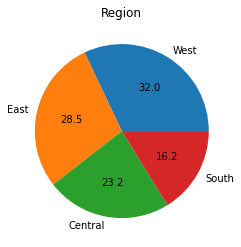

In [15]:
lab = ['West', 'East', 'Central', 'South']
plt.pie(data.Region.value_counts(), labels = lab, autopct = '%.1f') # autopct shows % values
plt.title('Region')
plt.show()

In [16]:
data.Category.value_counts() # Office Supplies amount to ~60% of total sales

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [17]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

#### Binders and Papers constitute ~28% of all sales, whereas Copiers amount to 0.68%

In [18]:
data.Quantity.value_counts()

3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

#### 57% sales occur in quantities ≤ 3 

In [19]:
data.drop(['Country', 'Postal Code'], axis = 1, inplace = True)

#### 'inplace = True' updates data directly negating the need for 'data = data.drop...'

In [20]:
data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

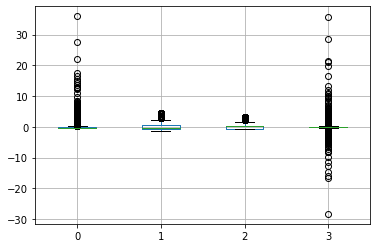

In [201]:
data1.boxplot()

#### plenty of outliers, even outside inter-quartile range.

In [203]:
#Scaling continuous values before checking correlation between them
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data1 = data.loc[:,['Sales', 'Quantity', 'Discount', 'Profit']]
data1 = sc.fit_transform(data1)
data1 = pd.DataFrame(data1)
data1.head()

,0,1,2,3
0,0.051510,-0.804303,-0.756643,0.056593
1,0.805633,-0.354865,-0.756643,0.815054
2,-0.345368,-0.804303,-0.756643,-0.093002
3,1.167688,0.544012,1.423149,-1.757484
4,-0.332935,-0.804303,0.212153,-0.111593


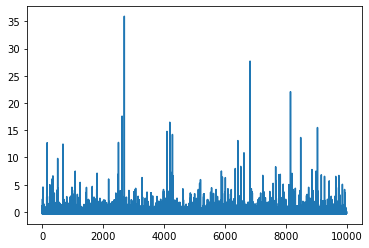

In [26]:
plt.plot(data1[0]) #Sales

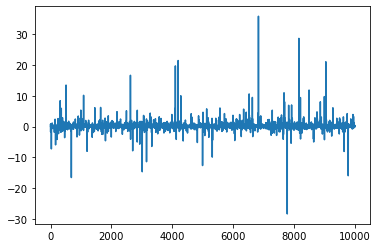

In [29]:
plt.plot(data1[3]) #Profit

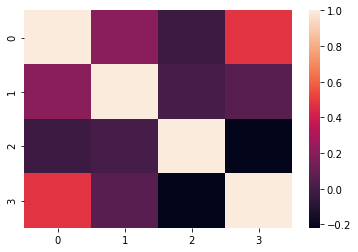

In [24]:
sns.heatmap(data1.corr())

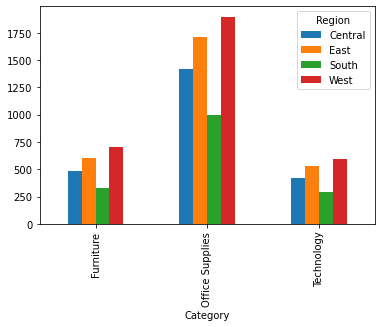

In [56]:
pd.crosstab(data.Category, data.Region).plot.bar()

#### Southern region consistently has the least amount of sales

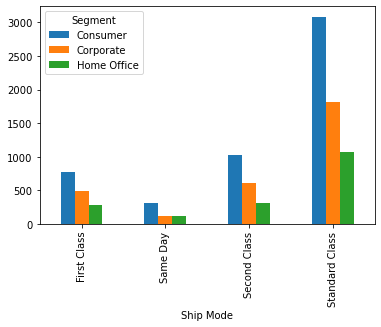

In [62]:
pd.crosstab(data['Ship Mode'], data.Segment).plot.bar()

#### Consumers prefer Standard Shipping

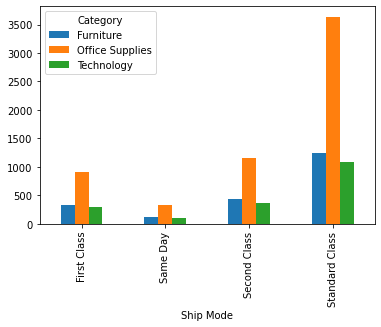

In [63]:
pd.crosstab(data['Ship Mode'], data.Category).plot.bar()

#### Throughout the categories & customer segments, Same Day shipping is by far the worst faring.

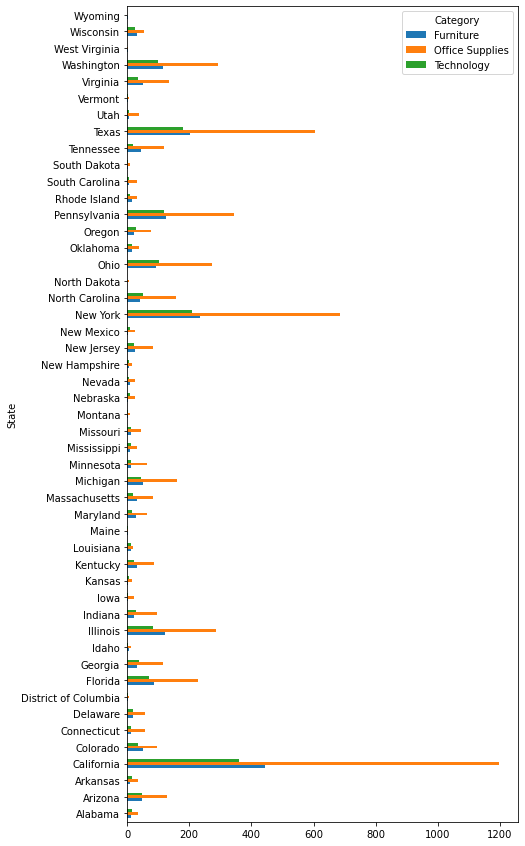

In [217]:
pd.crosstab(data['State'], data.Category).plot.barh(figsize = (7,15))

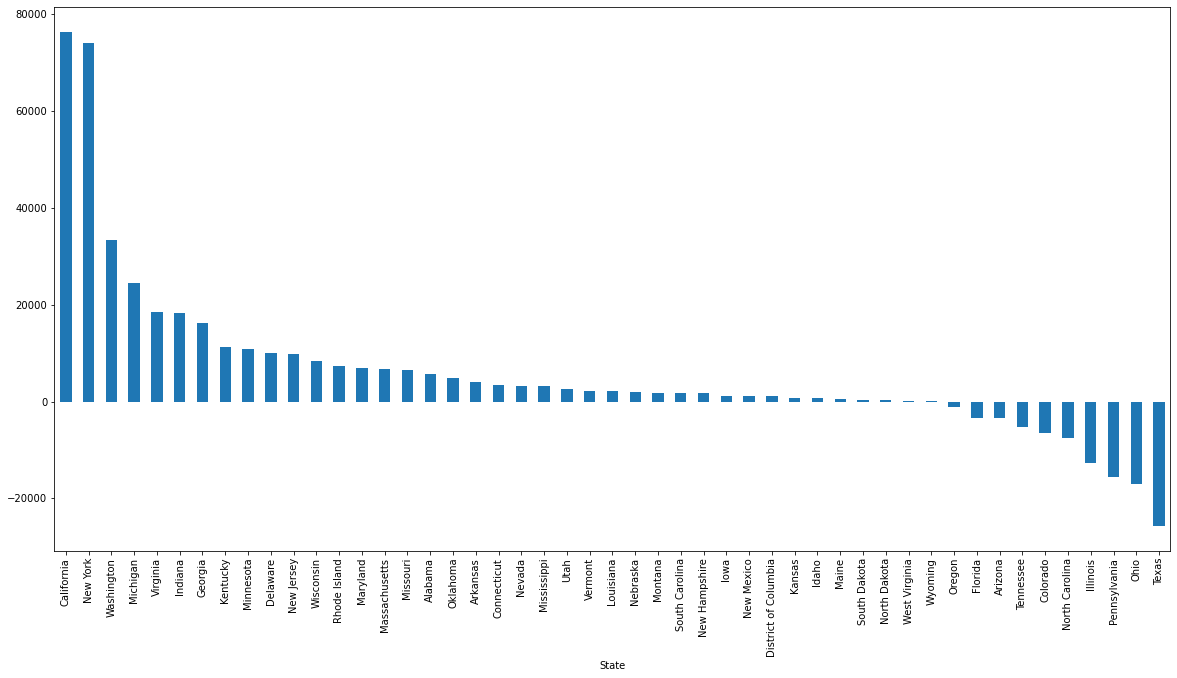

In [188]:
plt.figure(figsize = (20,10))
data.groupby('State')['Profit'].sum().sort_values(ascending = False).plot.bar()

#### Texas, Ohio, Pennsylvania, Illinois have the most losses among other states

# Data at a glance

### Columns:
#### 1. Ship Mode - Methods of shipping available - First Class, Same Day, Second Class, Standard Class
#### 2. Segment - Consumer, Corporate, Home Office
#### 3. Country - United States
#### 4. City - 531 cities
#### 5. State - 49 states
#### 6. Postal Code - 631 postal coedes
#### 7. Region - Central, East, South, West
#### 8. Category - Furniture, Office Supplies, Technology
#### 9. Sub-Category - 17 sub-categories
#### 10. Sales - sales figures, ranging from 0.444 to 22638.48
#### 11. Quantity - quantity of goods sold, from 1 to 14
#### 12. Discount - discount applied, from 0 to 0.8
#### 13. Profit - profits to company, from -6599.978 (loss incurred) to 8399.976

## Insights:

#### 1. Standard shipping is the go-to method of shipping, accounting for ~60% of all sales transactions, whereas Same Day shipping is chosen only in 5.4% of total sales, generating a meagre 5.55% of all profits.
#### 2. 52% of all transactions are initiated by consumers, bringing in 46.83% of total profits, whereas Home Office users contribute 17.8% of sales, generating 21.05% of total profits.
#### 3. California, New York, Texas account for 40% of total sales, although Texas is losing USD 25729.36 in revenue, whereas New York and California generate 25% & 26% of all profits respectively.  On the other hand, Kansas, Idaho, Montana, South Dakota, Vermont, District of Columbia, Maine, North Dakota, West Virginia, Wyoming are 10 states that collectively generate only 2.85% of total profits, while accounting for a mere 1.14% of total sales. We can move profit-heavy categories such as Technology & Office Supplies (50% & 42% of all profits respectively) to these states to boost their profits.
#### 4. Binders and Papers constitute ~28% of all sales, generating 22.44% of total profits, whereas Copiers amount to 0.68% of sales, while driving 19.4% of profits.
#### 5. 57% sales occur in quantities ≤ 3, generating 36% of profits. High-quantity sales (i.e., 12,13,14) generate only 3.58% profits.
#### 6. Texas, Ohio, Pennsylvania, Illinois have the most losses among other states, hence shifting their sales to Technology and Office Supplies might help drive profits.